In [1]:
import numpy
import torchvision

train = torchvision.datasets.MNIST('mnist_dataset/mnist', train = True, download = False)
test = torchvision.datasets.MNIST('mnist_dataset/mnist', train = False, download = False)

train_images = numpy.array([ numpy.array(item[0]) for item in train ])
train_labels = numpy.array([ item[1] for item in train ])

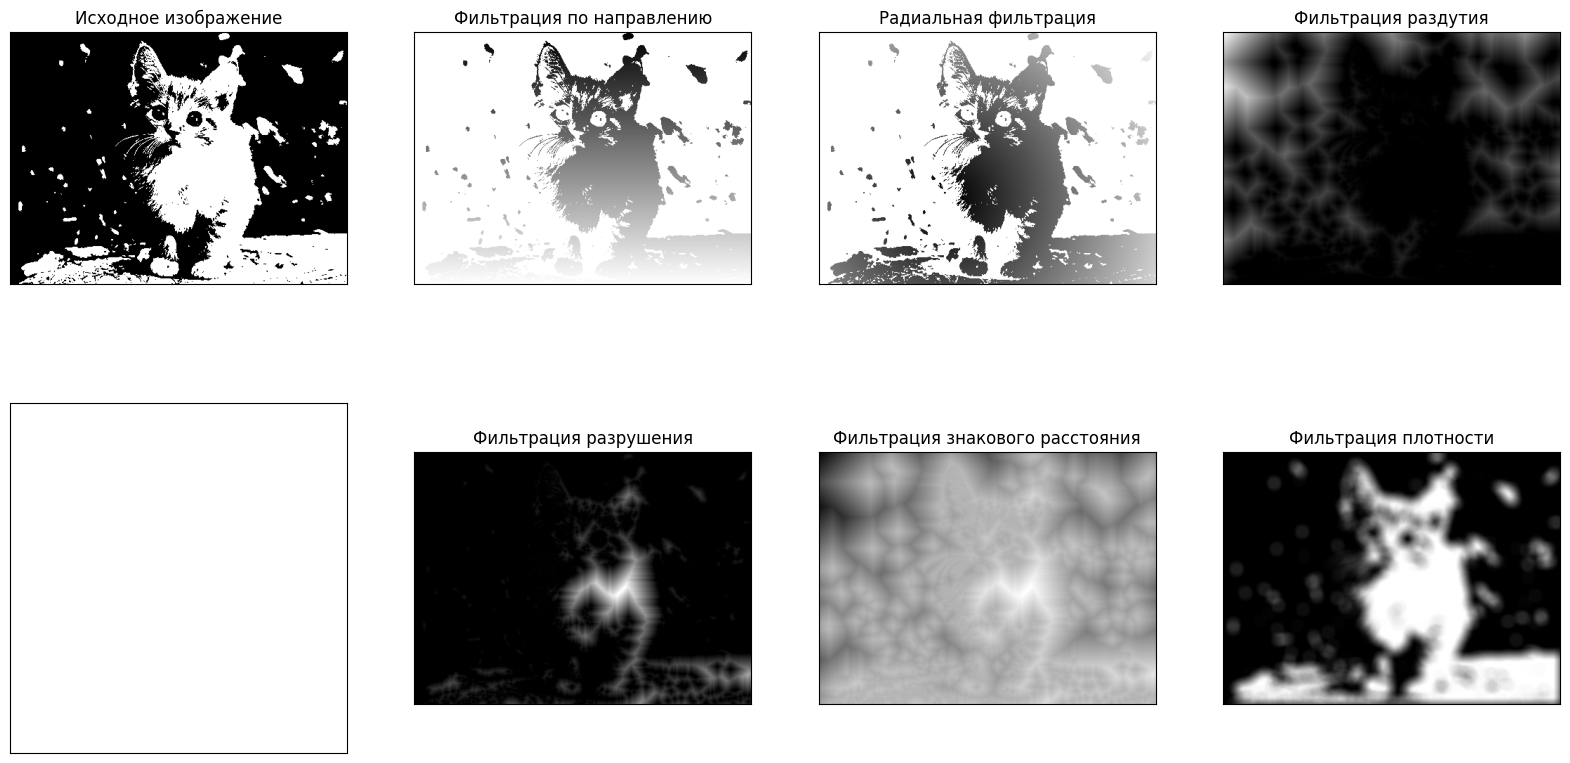

In [41]:
import gtda.images
import matplotlib.pyplot as plt

import PIL.Image
img = numpy.array(PIL.Image.open("report/image/image.jpg"))

import skimage.color
img = skimage.color.rgb2gray(img)

fig, axes = plt.subplots(2, 4, figsize = (20, 10))
axes = axes.flat
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

img = gtda.images.Binarizer(threshold = 0.6).fit_transform(numpy.array([ img ]))[0]

height = gtda.images.HeightFiltration(direction = numpy.array((0, 1)))
radial = gtda.images.RadialFiltration(center = numpy.array((180, 240)))
dilation = gtda.images.DilationFiltration()
erosion = gtda.images.ErosionFiltration()
signed_distance = gtda.images.SignedDistanceFiltration()
density = gtda.images.DensityFiltration(radius = 10)

axes[0].imshow(img, cmap = "gray")
axes[0].set_title("Исходное изображение")

axes[1].imshow(height.fit_transform(numpy.array([ img ]))[0], cmap = "gray")
axes[1].set_title("Фильтрация по направлению")

axes[2].imshow(radial.fit_transform(numpy.array([ img ]))[0], cmap = "gray")
axes[2].set_title("Радиальная фильтрация")

axes[3].imshow(dilation.fit_transform(numpy.array([ img ]))[0], cmap = "gray")
axes[3].set_title("Фильтрация раздутия")

axes[5].imshow(erosion.fit_transform(numpy.array([ img ]))[0], cmap = "gray")
axes[5].set_title("Фильтрация разрушения")

axes[6].imshow(signed_distance.fit_transform(numpy.array([ img ]))[0], cmap = "gray")
axes[6].set_title("Фильтрация знакового расстояния")

axes[7].imshow(density.fit_transform(numpy.array([ img ]))[0], cmap = "gray")
axes[7].set_title("Фильтрация плотности")

plt.savefig("report/filtrations2.svg")

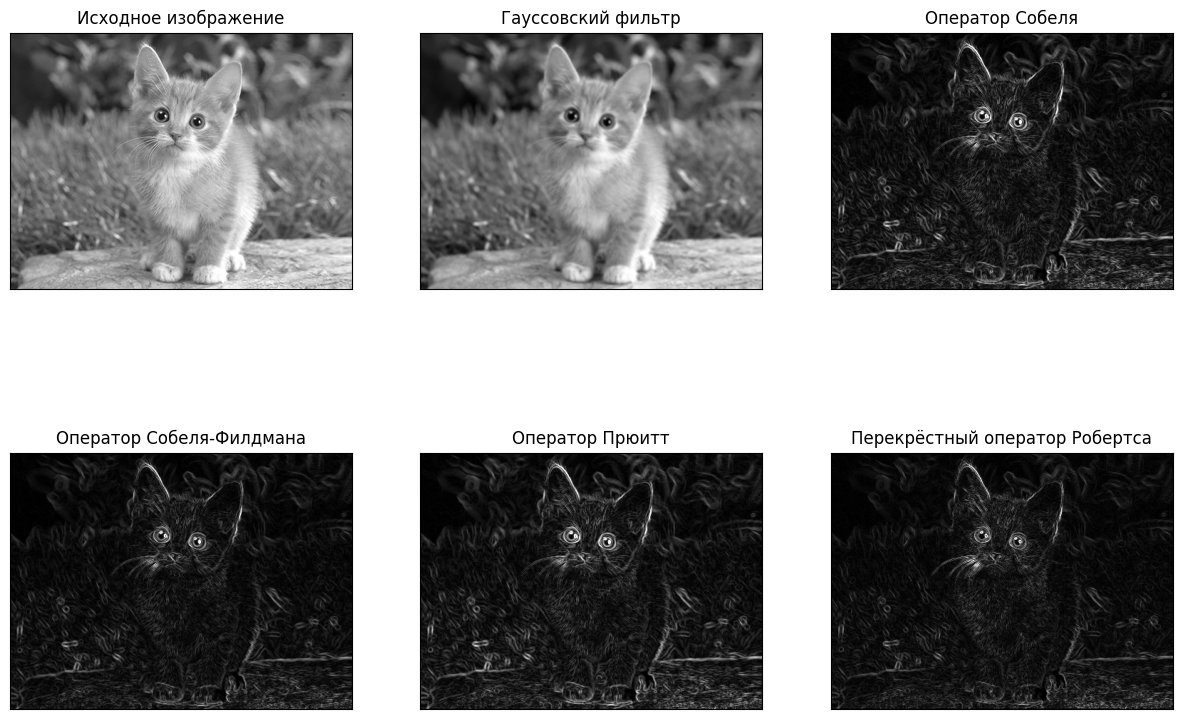

In [33]:
import torch
import skimage.filters
import scipy.ndimage

import PIL.Image
img = numpy.array(PIL.Image.open("report/image/image.jpg"))

import skimage.color
img = skimage.color.rgb2gray(img)

def sobel_fildman(images: numpy.ndarray) -> numpy.ndarray:
    sobel_hor = [
        [3, 10, 3.], 
        [0, 0, 0], 
        [-3, -10, -3]
    ]

    sobel_ver = [
        [3, 0, -3], 
        [10, 0, -10], 
        [3, 0, -3]
    ]

    sobel_hor = torch.tensor([[sobel_hor]], dtype = torch.float32)
    sobel_ver = torch.tensor([[sobel_ver]], dtype = torch.float32)

    images = torch.tensor(images, dtype = torch.float32).unsqueeze(dim = 1)

    img_conv_hor = torch.nn.functional.conv2d(images, sobel_hor)
    img_conv_vet = torch.nn.functional.conv2d(images, sobel_ver)

    images = torch.sqrt(img_conv_hor ** 2 + img_conv_vet ** 2)
    return images.squeeze(dim = 1).numpy()

fig, axes = plt.subplots(2, 3, figsize = (15, 10))
axes = axes.flat
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    
axes[0].imshow(img, cmap = "gray")
axes[0].set_title("Исходное изображение")

axes[1].imshow(scipy.ndimage.gaussian_filter(img, sigma = 1, radius = 3), cmap = "gray")
axes[1].set_title("Гауссовский фильтр")

axes[2].imshow(numpy.minimum(skimage.filters.sobel(img), 0.33), cmap = "gray")
axes[2].set_title("Оператор Собеля")

axes[3].imshow(numpy.minimum(sobel_fildman(numpy.array([ img ]))[0], 10), cmap = "gray")
axes[3].set_title("Оператор Собеля-Филдмана")

axes[4].imshow(numpy.minimum(skimage.filters.prewitt(img), 0.33), cmap = "gray")
axes[4].set_title("Оператор Прюитт")

axes[5].imshow(numpy.minimum(skimage.filters.roberts(img), 0.4), cmap = "gray")
axes[5].set_title("Перекрёстный оператор Робертса")

plt.savefig("report/filters2.svg")

Text(0.5, 1.0, 'Кубический комплекс ($\\epsilon$ = 225)')

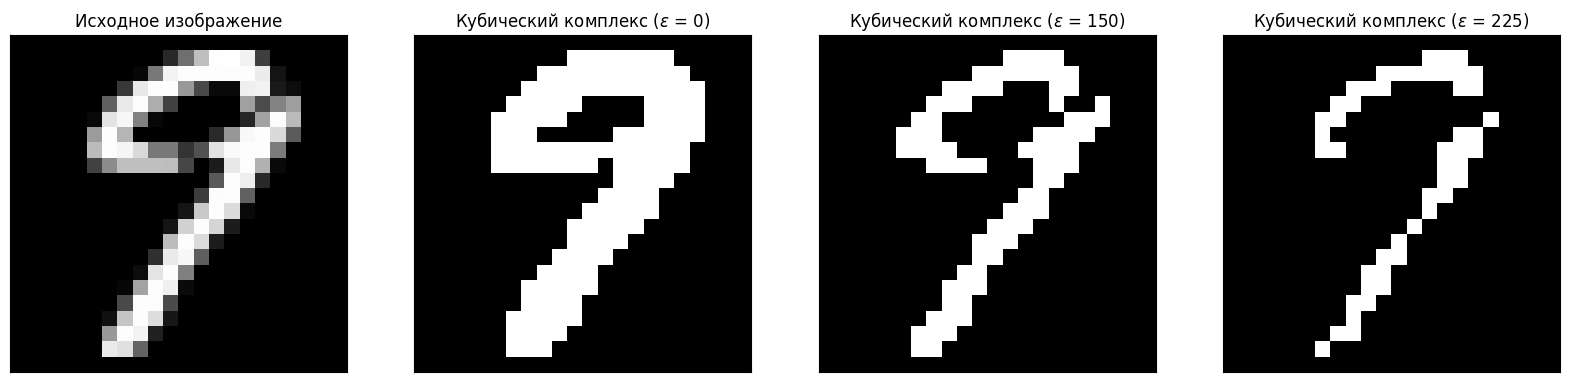

In [53]:
import matplotlib.pyplot as plt

img = train_images[59973, 6:, 3:-3]

fig, axes = plt.subplots(1, 4, figsize = (20, 5))
axes = axes.flat
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])

axes[0].imshow(img, cmap = "gray")
axes[0].set_title("Исходное изображение")

axes[1].imshow(img > 0, cmap = "gray")
axes[1].set_title(f'Кубический комплекс ($\epsilon$ = 0)')

axes[2].imshow(img > 150, cmap = "gray")
axes[2].set_title(f'Кубический комплекс ($\epsilon$ = 150)')

axes[3].imshow(img > 225, cmap = "gray")
axes[3].set_title(f'Кубический комплекс ($\epsilon$ = 225)')

# plt.savefig("report/complex.svg")

In [ ]:
import gtda.homology

gtda.homology.CubicalPersistence().fit_transform_plot([ img ])

In [ ]:
import sklearn.base
class FeatureExtractor(sklearn.base.TransformerMixin):
    def transform():
        pass
test_images = 123

def classify():
    pass
test_labels = 12

In [ ]:
# Feature extraction
feature_extractor = FeatureExtractor()
train_features = feature_extractor.fit_transform(train_images)
test_features = feature_extractor.transform(test_images)

# Classification
classify(train_features, train_labels, test_features, test_labels)

In [ ]:
import numpy
import torchvision

test = torchvision.datasets.CIFAR10('cifar10_dataset/cifar-10', train = False, download = False)

ID = 5687
img = numpy.array(test[ID][0])
test[ID][0]

In [ ]:
import gtda.homology
import gtda.plotting

cp = gtda.homology.CubicalPersistence(homology_dimensions = list(range(0, 3)))
d = cp.fit_transform([ img ])
print(d.shape)

plot = gtda.plotting.plot_diagram(d[0])
display(plot)
plot.write_image(f"report/feature_calculator/diagram.svg", format = "svg")

In [ ]:
import gtda.diagrams

f = gtda.diagrams.Filtering(epsilon = 5)
diagrams = f.fit_transform(d)

plot = gtda.plotting.plot_diagram(diagrams[0])
display(plot)
plot.write_image(f"report/feature_calculator/filtered.svg", format = "svg")

In [ ]:
print_obj = 0
birth, death, dim = diagrams[print_obj, :, 0], diagrams[print_obj, :, 1], diagrams[print_obj, :, 2]
life = death - birth

birth, death, dim = birth[life > 0], death[life > 0], dim[life > 0]
bd2 = (birth + death) / 2.0
life = death - birth
print(life.shape)

import pandas
import matplotlib.pyplot as plt

life_hist = pandas.DataFrame(life.reshape(-1, 1)).hist(bins = 25)
plt.savefig("report/feature_calculator/life.svg")

bd2_hist = pandas.DataFrame(bd2.reshape(-1, 1)).hist(bins = 25)
plt.savefig("report/feature_calculator/bd2.svg")

In [ ]:
import gtda.curves
import gtda.diagrams
import gtda.plotting

betti = gtda.diagrams.BettiCurve()
betti_curves = betti.fit_transform(diagrams)
betti_fig = betti.plot(betti_curves, sample = 0)
betti_fig.update_layout(width = 1000, height = 1000)
display(betti_fig)
betti_fig.write_image(file = f"report/feature_calculator/betti.svg", format = "svg")

In [ ]:
import gtda.curves
import gtda.diagrams
import gtda.plotting

landscape = gtda.diagrams.PersistenceLandscape(n_layers = 3)
landscapes = landscape.fit_transform(diagrams)
landscape_fig = landscape.plot(landscapes, sample = 0)
landscape_fig.update_layout(width = 1000, height = 1000)
display(landscape_fig)
landscape_fig.write_image(file = f"report/feature_calculator/landscape.svg", format = "svg")

In [ ]:
import gtda.curves
import gtda.diagrams
import gtda.plotting

silhouette = gtda.diagrams.Silhouette(power = 1)
silhouettes = silhouette.fit_transform(diagrams)
silhouette_fig = silhouette.plot(silhouettes, sample = 0)
silhouette_fig.update_layout(width = 1000, height = 1000)
display(silhouette_fig)
silhouette_fig.write_image(file = f"report/feature_calculator/silhouette.svg", format = "svg")

In [ ]:
import gtda.curves
import gtda.diagrams
import gtda.plotting

image = gtda.diagrams.PersistenceImage(sigma = numpy.pi, n_bins = 75)
images = image.fit_transform(diagrams)
image_fig = image.plot(images, sample = 0)
image_fig.update_layout(width = 1000, height = 1000)
display(image_fig)
image_fig.write_image(file = f"report/feature_calculator/persistence_image.svg", format = "svg")

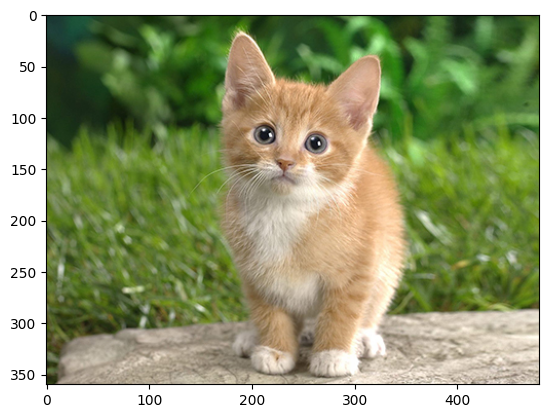

In [1]:
import numpy
import PIL.Image
img = numpy.array(PIL.Image.open("report/image/image.jpg"))

import matplotlib.pyplot as plt
plt.imshow(img)

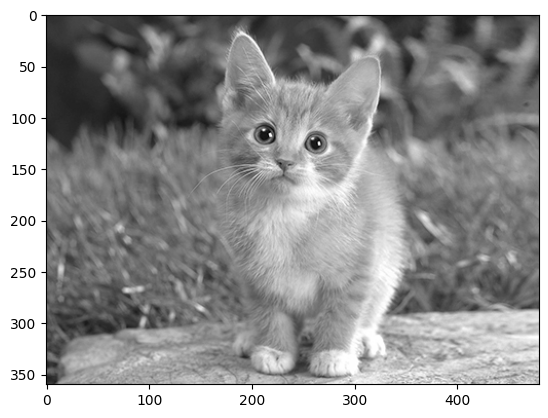

In [2]:
import skimage.color
import skimage.io

gray = skimage.color.rgb2gray(img)
fig = plt.imshow(gray, cmap = "gray")

PIL.Image.fromarray(numpy.uint8(gray * 255), mode = 'L').save("report/image/gray.png")

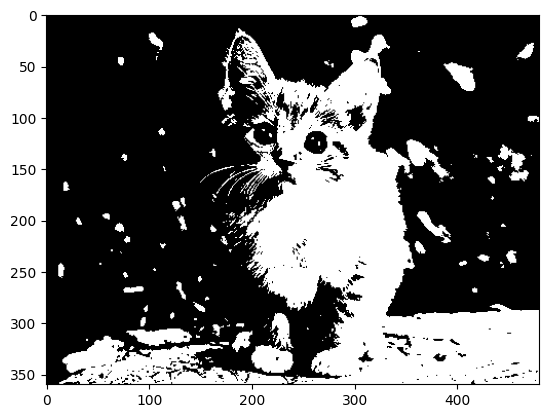

In [3]:
bin = (gray > 0.6)
plt.imshow(bin, cmap = "gray")

PIL.Image.fromarray(numpy.uint8(bin * 255), mode = 'L').save("report/image/bin.png")

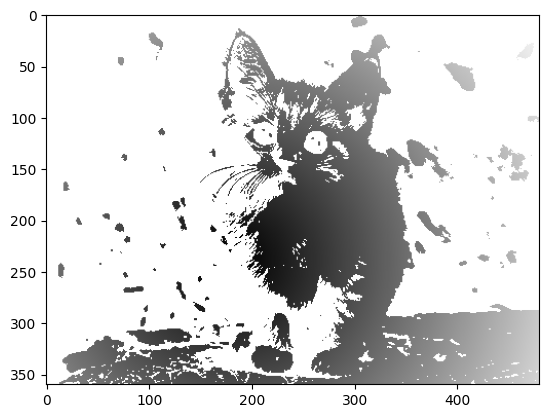

In [4]:
import gtda.images

filt = gtda.images.RadialFiltration(center = numpy.array([ 180, 240 ])).fit_transform(numpy.array([ bin ]))[0]
plt.imshow(filt, cmap = "gray")

PIL.Image.fromarray(numpy.uint8((filt / filt.max()) * 255), mode = 'L').save("report/image/filtration.png")

In [23]:
import gtda.homology
import gtda.plotting

diagram = gtda.homology.CubicalPersistence().fit_transform(numpy.array([ gray ]))[0]

fig = gtda.plotting.plot_diagram(diagram)

fig.update_layout(width = 600, height = 600)
display(fig)
fig.write_image(file = f"report/image/pointcloud.svg", format = "svg")

100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


In [27]:
import gtda.images

gtda.images.ImageToPointCloud().fit_transform_plot(numpy.array([ bin ]))

[array([[ 12, 105],
        [ 12, 106],
        [ 12, 107],
        ...,
        [479, 257],
        [479, 258],
        [479, 259]], dtype=int64)]

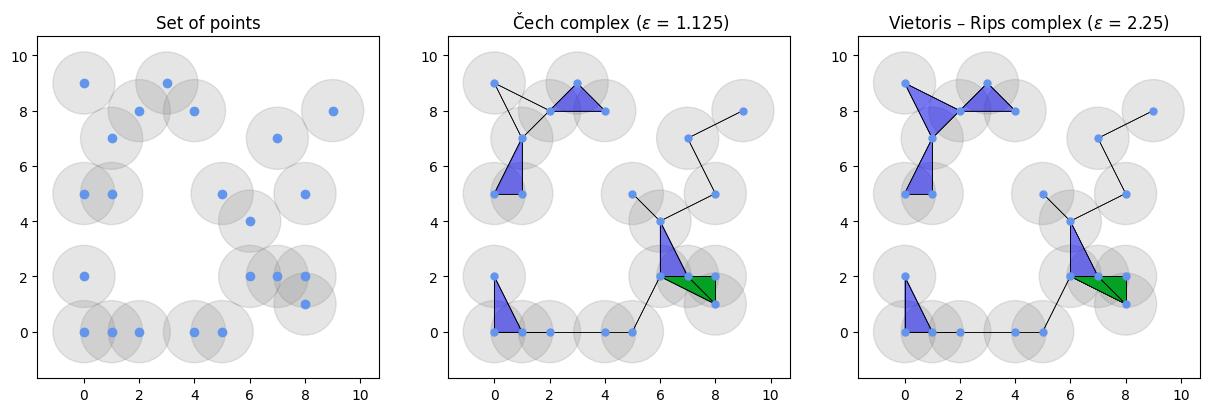

In [1]:
import numpy
import itertools
import matplotlib.pyplot as plt
import matplotlib.patches as ptchs

eps = 1.125
numpy.random.seed(6876)
homology_dimensions = [ 3, 4, 5, 2, 1 ]

points = numpy.random.randint(0, 10, (25, 2))
points = numpy.unique(points, axis = 0)
fig, axes = plt.subplots(1, 3, figsize = (15, 5))

def setup_axis(ax, points):
    ax.set_aspect('equal')
    for (x, y) in points:
        ax.add_patch(ptchs.Circle((x, y), eps, color = 'gray', alpha = 0.2))
    ax.scatter(points[:, 0], points[:, 1], alpha = 0)

def draw_simplex(ax, points):
    colors = [ None, 'cornflowerblue', 'black', (0, 0, 1, 0.1), (0, 0.75, 0, 0.1) ]
    color = colors[len(points)]
    if len(points) == 1:
        ax.scatter(points[0][0], points[0][1], 25, color = color)
    else:
        for pts in itertools.permutations(points):
            ax.add_patch(ptchs.Polygon(pts, color = color, linewidth = 0.5))


setup_axis(axes[0], points)
axes[0].set_title('Set of points')
axes[0].scatter(points[:, 0], points[:, 1], color = 'cornflowerblue')


setup_axis(axes[1], points)
axes[1].set_title(f' Čech complex ($\epsilon$ = {eps})')
for dim in homology_dimensions:
    for pts in itertools.combinations(points, dim):
        pts = numpy.array(pts)
        xmin, xmax = numpy.min(pts[:, 0]), numpy.max(pts[:, 0])
        ymin, ymax = numpy.min(pts[:, 1]), numpy.max(pts[:, 1])
        if (xmax - xmin > 2 * eps) or (ymax - ymin > 2 * eps): continue
        x_range = numpy.arange(xmin - eps, xmax + eps, 0.01)
        y_range = numpy.arange(ymin - eps, ymax + eps, 0.01)
        for (c_x, c_y) in itertools.product(x_range, y_range):
            x_dist = (pts[:, 0] - c_x) ** 2
            y_dist = (pts[:, 1] - c_y) ** 2
            is_ok = (x_dist + y_dist) <= (eps ** 2)
            if (is_ok.all()):
                draw_simplex(axes[1], pts)
                break


setup_axis(axes[2], points)
axes[2].set_title(f'Vietoris – Rips complex ($\epsilon$ = {2 * eps})')
for dim in homology_dimensions:
    for pts in itertools.combinations(points, dim):
        is_simplex = True
        for (x1, y1), (x2, y2) in itertools.product(pts, pts):
            dist = (x2 - x1) ** 2 + (y2 - y1) ** 2
            if dist > (2 * eps) ** 2:
                is_simplex = False
                break
        if is_simplex: draw_simplex(axes[2], pts)

fig.savefig(f"report/complexes.svg")
fig.savefig(f"report/complexes.png")